In [15]:
import numpy as np
def jacobi(A, b, x0, tol, max_iterations):
    true=np.linalg.solve(A,b)
    n = len(b)
    x = x0.copy()
    an=[]
    #print(x)
    for k in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]
        
        #
        an.append(np.linalg.norm(x_new - true, ord=np.inf))
        
        # Check for convergence
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k,an
        x = x_new
        #print(x)
        
    return x, max_iterations,an

def gauss_seidel(A, b, x0, tol, max_iterations):
    true=np.linalg.solve(A,b)
    n = len(b)
    x = x0.copy()
    an=[]
    #print(x)
    
    for k in range(max_iterations):
        x_new = x.copy()
        
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i)) # Using already updated values
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n)) # Using old values
            x_new[i] = (b[i] - s1 - s2) / A[i][i]
            # Check for convergence
        an.append(np.linalg.norm(x_new - true, ord=np.inf))
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k,an
        x = x_new
        #print(x)
    return x, max_iterations,an

In [16]:
A=([[3,-0.1,-0.2],
    [0.1,7,-0.3],
    [0.3,-0.2,10]])
b=([7.85,19.3,71.4])
x0=np.zeros_like(b)
maxit=10000
t1=1e-3
t2=1e-6
t3=1e-9

In [19]:
sol,iteJ1,an1=jacobi(A,b,x0,t1,maxit)
print("Jacobi iterations with a 10^-3 tolerance is",iteJ1)

sol,iteJ2,an2=jacobi(A,b,x0,t2,maxit)
print("Jacobi iterations with a 10^-6 tolerance is",iteJ2)

sol,iteJ3,an3=jacobi(A,b,x0,t3,maxit)
print("Jacobi iterations with a 10^-9 tolerance is",iteJ3)

sol,iteG1,an4=gauss_seidel(A,b,x0,t1,maxit)
print("Gauss iterations with a 10^-3 tolerance is",iteG1)

sol,iteG2,an5=gauss_seidel(A,b,x0,t2,maxit)
print("Gauss iterations with a 10^-6 tolerance is",iteG2)

sol,iteG3,an6=gauss_seidel(A,b,x0,t3,maxit)
print("Gauss iterations with a 10^-9 tolerance is",iteG3)

Jacobi iterations with a 10^-3 tolerance is 4
Jacobi iterations with a 10^-6 tolerance is 6
Jacobi iterations with a 10^-9 tolerance is 8
Gauss iterations with a 10^-3 tolerance is 3
Gauss iterations with a 10^-6 tolerance is 4
Gauss iterations with a 10^-9 tolerance is 6


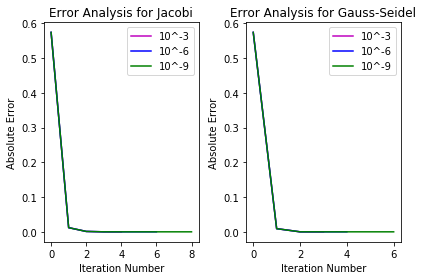

In [18]:
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(1,2,1)
plt.plot(an1,'m',label='10^-3')
plt.plot(an2,'b',label='10^-6')
plt.plot(an3,'g',label='10^-9')
plt.xlabel('Iteration Number')
plt.ylabel('Absolute Error')
plt.title('Error Analysis for Jacobi')
plt.legend()


plt.subplot(1,2,2)
plt.plot(an4,'m',label='10^-3')
plt.plot(an5,'b',label='10^-6')
plt.plot(an6,'g',label='10^-9')
plt.xlabel('Iteration Number')
plt.ylabel('Absolute Error')
plt.title('Error Analysis for Gauss-Seidel')
plt.legend()


plt.tight_layout()
plt.show()


### The higher the tolerance, the more number of iterations it will take to reach convergence. This is due to the fact that it will need to match the true answer to an increasing amount of numbers after the decimal point as a higher tolerance is used. Additionally the Gauss-Seidel technique uses less iterations overall when comparing it to the Jacobi method.